In [2]:
run run_residuals -lx -i FE_H -u -0.1 -d -0.105 -s red_clump -c False

In [14]:
hidefigs = False
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Do EMPCA
nvecs = 30
empcaname = starsample.outName('pkl',content = 'empca',order = starsample.order,seed = starsample.seed,cross=starsample.cross)
empcaname = empcaname.split('pkl')[0]+'nvec{0}'.format(nvecs)+'.pkl'
if os.path.isfile(empcaname):
    empcamodel,empcamodel_weight = acs.pklread(empcaname)
elif not os.path.isfile(empcaname):
    mask = (starsample.residual.mask.T==False)
    weights = mask.astype(int)
    weights[mask] = 1./starsample.errs[mask]**2 # Correct?
    empcamodel,runtime1 = timeIt(empca,starsample.residual.T,weights = mask.astype(int),nvec=nvecs)
    print 'Runtime:', runtime1/60.,' min'
    empcamodel_weight,runtime2 = timeIt(empca,starsample.residual.T,weights = weights,nvec=nvecs)
    print 'Runtime:', runtime2/60.,' min'
    acs.pklwrite(empcaname,[empcamodel,empcamodel_weight])

       iter        R2             rchi2
EMPCA  1/25       0.06569311      0.00013604
EMPCA  2/25       0.40125172      0.00008715
EMPCA  3/25       0.45491544      0.00007934
EMPCA  4/25       0.48090289      0.00007556
EMPCA  5/25       0.49668297      0.00007326
EMPCA  6/25       0.50558846      0.00007196
EMPCA  7/25       0.50944357      0.00007140
EMPCA  8/25       0.51056226      0.00007124
EMPCA  9/25       0.51148607      0.00007111
EMPCA 10/25       0.51352315      0.00007081
EMPCA 11/25       0.51578145      0.00007048
EMPCA 12/25       0.51753873      0.00007023
EMPCA 13/25       0.51885869      0.00007003
EMPCA 14/25       0.52001450      0.00006986
EMPCA 15/25       0.52102754      0.00006972
EMPCA 16/25       0.52181588      0.00006960
EMPCA 17/25       0.52247036      0.00006951
EMPCA 18/25       0.52308949      0.00006942
EMPCA 19/25       0.52356954      0.00006935
EMPCA 20/25       0.52375285      0.00006932
EMPCA 21/25       0.52362228      0.00006934
EMPCA 22/25    

In [9]:
R2noise = 1 - np.ma.var(starsample.errs)/np.ma.var(starsample.residual.T)
R2 = np.zeros(nvecs)
R2_w = np.zeros(nvecs)
for vec in range(nvecs):
    R2[vec] = empcamodel.R2(vec)
    R2_w[vec] = empcamodel_weight.R2(vec)

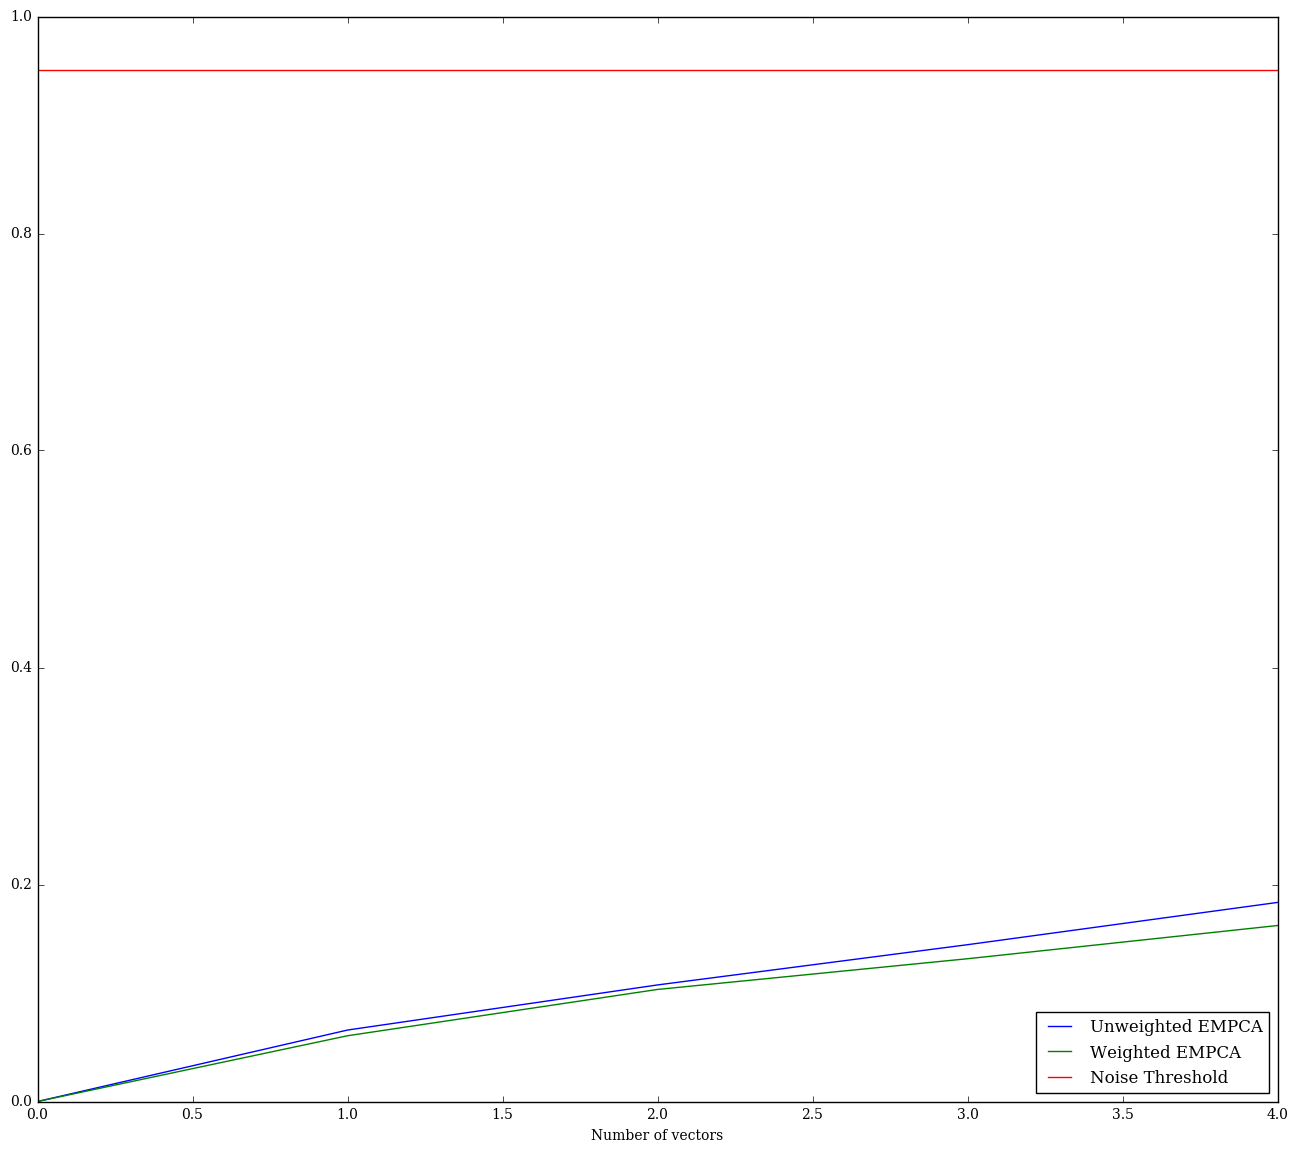

In [15]:
plt.figure(1)
plt.plot(range(nvecs),R2,label='Unweighted EMPCA')
plt.plot(range(nvecs),R2_w,label='Weighted EMPCA')
plt.axhline(R2noise,color='red',label='Noise Threshold')
plt.xlabel('Number of vectors')
plt.legend(loc='best')
if label != 0:
    plt.savefig('./{0}/empcaR2_order{1}_seed{2}_cross{3}_{4}_u{5}_d{6}_nvec{7}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,label,up,low,nvecs))
elif label == 0:
    plt.savefig('./{0}/empcaR2_order{1}_seed{2}_cross{3}_nvec{4}.png'.format(starsample.type, starsample.order,starsample.seed,starsample.cross,nvecs))
if hidefigs:
    plt.close()

In [ ]:
for elem in elems